In [105]:
import readligo
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from gwpy.timeseries import TimeSeries
from scipy.interpolate import interp1d
from scipy.signal import butter, filtfilt, iirdesign, zpk2tf, freqz

In [4]:
strain, time, dq = readligo.loaddata('/home/aditya/Downloads/ligo.hdf5')

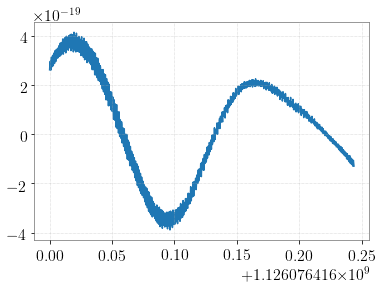

In [5]:
plt.plot(time[0:1000],strain[0:1000])

[10, 2000, 1e-49, 1e-38]

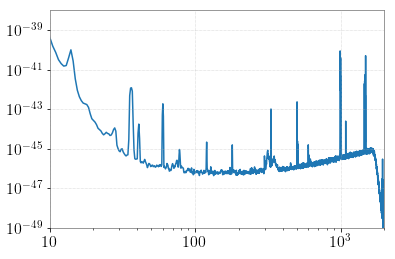

In [6]:
fs = 1. / (time[1] - time[0])
length = 128.
cut = int(fs * length)

strain_cut = strain[0:cut]
time_cut = time[0:cut]

pxx , freqs = mlab.psd(strain_cut, Fs=fs, NFFT=2*int(fs))
plt.loglog(freqs,pxx)
plt.axis([10,2000,1e-49,1e-38])

#### Check Questions

_**What are the strongest line features in the PSD above?**_

The strongest lines in the above PSD see to be at 1000 Hz and 1500 Hz, and are caused by the thermal excitations of the mirror suspensions.

**_What is the most sensitive frequency band for LIGO?_**

The most sensitive frequency band for LIGO would be where the Power is low and relatively devoid of noise. From the PSD, this looks to be 50-200 Hz.

**_What is the ratio of noise power at 20 Hz compared with 100 Hz?_** - 419.72(code written below)

In [7]:
pxx[int(20./(freqs[1] - freqs[0]))]/pxx[int(100./(freqs[1] - freqs[0]))]

419.7251950322969

_**What are the main broad-band noise compentents at low-frequency (f<50 Hz) and high-frequency (f>300 Hz)?**_

The Low frequency noise is seismic noise, and the high-frequency broadband noise is the violin modes frequency of the suspensions.

## Whiten GW150914

1. Download a data file that contains the data for GW150914
 1. Hint: GPS 1126259462.4
1. Whiten and band-pass the data
 1. Hint: See the Quickview tutorial: https://github.com/losc-tutorial/quickview/blob/master/index.ipynb
1. Plot the whitened, band-passed time series.  Can you see the signal?

In [41]:
strain, time, dq = readligo.loaddata('/home/aditya/Downloads/150914.hdf5')

(-0.1, 0.05)

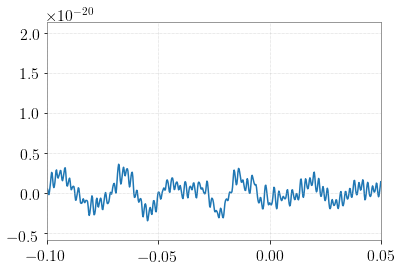

In [111]:
t0 = 1126259462.43
dt = (time[1] - time[0])
fs = int(np.round(1. / (time[1] - time[0])))
max_time = 15

shifted_time = time - t0
ind = max_time * fs
cen = np.where(np.abs(shifted_time) < 1e-4)[0][0]
time_final = shifted_time[cen - ind : cen + ind]
strain_final = strain[cen - ind : cen + ind]
#time_final = time[]

hf = np.fft.rfft(strain_final)
freqs = np.fft.rfftfreq(len(strain_final),dt)
pxx , freqs_pxx = mlab.psd(strain_final, Fs=fs, NFFT=fs,window=np.blackman(fs),
                          noverlap=fs/2)
psd = interp1d(freqs_pxx, pxx)
asd = np.sqrt(psd(freqs)/2/dt)
hf_white = hf / asd
strain_white = np.fft.irfft(hf_white, n=len(strain_final))

high_freq = 600.
low_freq  = 30.
bb, ab = butter(4, [low_freq*2./fs, high_freq*2./fs], btype='band')
strain_whitebp = filtfilt(bb, ab, strain_final)

plt.plot(time_final,strain_whitebp)
#plt.plot(time_final,strain_final)
plt.xlim([-0.1,0.05])
#plt.ylim([-10,10])

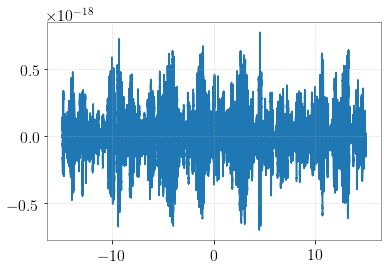

In [97]:
plt.plot(time_final, strain_final)

In [59]:
np.where(np.abs(time - t0) < 1e-4)

(array([67297]),)

In [71]:
len(np.blackman(fs))

4096

In [107]:
butter(4, [low_freq*2./fs, high_freq*2./fs], btype='band')

(array([ 0.01453774,  0.        , -0.05815097,  0.        ,
         0.08722645,  0.        , -0.05815097,  0.        ,
         0.01453774]),
 array([  1.        ,  -5.61307757,  13.86567599, -19.85366723,
         18.15049106, -10.8810134 ,   4.16846436,  -0.92995613,
          0.09308418]))